# Empresa de telecomunicações Megaline

## Objetivo:

A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, levene

## Carreguamento dos dados

In [ ]:
# Carregamento dos arquivos de dados em diferentes DataFrames

calls = pd.read_csv('megaline_calls.csv') 

internet = pd.read_csv('megaline_internet.csv') 

messages = pd.read_csv('megaline_messages.csv')

plans = pd.read_csv('megaline_plans.csv') 

users = pd.read_csv('megaline_users.csv')

## Prepare os dados

## Planos

In [8]:
# Informações gerais/resumo sobre o DataFrame dos planos

print(plans.info())
print() 
print(plans.head())
print()
print(plans.isnull().sum()) # Verificar valores ausentes
print()
print(plans.duplicated().sum()) # verificar valores duplicados



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes
None

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10     

**Dados informativo sobre a descrição dos dois planos existentes na empresa, Surf e Ultimate. O nome das colunas estão corretos  e sem letras maiúsculas ou espaços. Sem dados duplicados ou ausentes**

## Usuários

In [9]:
# Informações gerais/resumo sobre o DataFrame dos usuários

print(users.info())
print() 
print(users.isnull().sum()) # Verificar valores ausentes
print()
print(users.duplicated().sum()) # verificar valores duplicados
print()
print(users.head()) # amostra de dados dos usuários

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

0

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36 

**Nos dados "users" temos amostra de 500 clientes. Em relação aos nomes das colunas, estão corretos, sem letras maiúsculas ou espaços. Verifiquei que não temos dados duplicados. Em relação aos dados ausentes, na coluna 'churn_date' temos 466 linhas ausentes. As linhas ausentes representam clientes ativos, então vou substituir o ausente por uma data extrema fixa.**

**Tanto a coluna 'reg_date' como 'churn_date' que estão como objeto, vou converter para Datetime**

### Correção dos dados: 'users'

In [10]:
# Substituir valores ausentes por uma data fictícia

users['churn_date'] = users['churn_date'].fillna(pd.Timestamp('2099-12-31'))

# Converter as colunas `reg_date` e 'churn_date' para datetime

users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

print(users.info())
print() 
print(users.isnull().sum()) # Verificar valores ausentes
print()
print(users.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB
None

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

    user_id first_name  last_name  age  \
0      1000   Anamaria      Bauer   45   
1      1001     Mickey  Wilkerson   28   
2      1002     Carlee    Hoffman   36   
3      1003   Reynaldo    Jenk

## Chamadas

In [ ]:
# Informações gerais/resumo sobre o DataFrame das chamadas

print(calls.info())
print() 
print(calls.isnull().sum()) # Verificar valores ausentes
print()
print(calls.duplicated().sum()) # verificar valores duplicados
print()
print(calls.head()) # amostra de dados das chamadas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None

id           0
user_id      0
call_date    0
duration     0
dtype: int64

0

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


**No arquivo 'calls' posso observar que temos 137735 linha que é referente a amostragem de 500 clientes em um período determinado. Não encontrei nenhum valor ausente ou duplicado. A unica alteração será na coluna 'call_date' que está como string e vou transformar em DateTime.**

### Correção dos dados: 'calls'

In [12]:
# Converter a coluna `call_date` para datetime

calls['call_date'] = pd.to_datetime(calls['call_date'])

print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


## Mensagens

In [13]:
# Informações gerais/resumo sobre o DataFrame das mensagens

print(messages.info())
print() 
print(messages.isnull().sum()) # Verificar valores ausentes
print()
print(messages.duplicated().sum()) # verificar valores duplicados
print()
print(messages.head()) # amostra dos dados das mensagens

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None

id              0
user_id         0
message_date    0
dtype: int64

0

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


**Nos dados 'menssages' posso observar que temos 76051 linha que é referente a amostragem de 500 clientes em um período determinado. Não encontrei nenhum valor ausente ou duplicado. A unica alteração será na coluna 'message_date' que está como string e vou transformar em DateTime.**

### Correção dos dados: 'menssages'

In [14]:
# Converter a coluna `message_date` para datetime

messages['message_date'] = pd.to_datetime(messages['message_date'])

print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB
None


## Internet

In [15]:
# Imprima informações gerais/resumo sobre o DataFrame da internet

print(internet.info())
print() 
print(internet.isnull().sum()) # Verificar valores ausentes
print()
print(internet.duplicated().sum()) # verificar valores duplicados
print()
print(internet.head()) # amostra de dados para o tráfego da internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
None

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

0

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22


**No último arquivo 'internet' posso observar que temos 104825 linha que é referente a amostragem de 500 clientes em um período determinado. Não encontrei nenhum valor ausente ou duplicado. A unica alteração será na coluna 'session_date' que está como string e vou transformar em DateTime.**

### Correção dos dados: 'internet'

In [16]:
# Converter a coluna `session_date` para datetime

internet['session_date'] = pd.to_datetime(internet['session_date'])

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None


## Entendendo as condições dos planos

In [17]:
# Imprima as condições dos planos 

print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


## Agregando os dados por usuário

In [18]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.

# Criação coluna 'month' para armazenar o ano e mês (YYYY-MM)
calls['month'] = calls['call_date'].dt.to_period('M')

# Calculo do número de chamadas feitas por cada usuário por mês
calls_per_user_month = calls.groupby(['user_id', 'month']).size().reset_index(name='calls_count')

# Resultado
print(calls_per_user_month.head())

   user_id    month  calls_count
0     1000  2018-12           16
1     1001  2018-08           27
2     1001  2018-09           49
3     1001  2018-10           65
4     1001  2018-11           64


In [19]:
# Calculo da quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

# Arredondando cada chamada para cima (seguindo a regra da empresa)
calls['rounded_duration'] = np.ceil(calls['duration'])

# Calculo da quantidade de minutos gastos por cada usuário por mês
minutes_per_user_month = calls.groupby(['user_id', 'month'])['rounded_duration'].sum().reset_index()

# Renome da coluna para um nome mais claro
minutes_per_user_month.rename(columns={'rounded_duration': 'total_minutes'}, inplace=True)

# Resultado
print(minutes_per_user_month.head())

   user_id    month  total_minutes
0     1000  2018-12          124.0
1     1001  2018-08          182.0
2     1001  2018-09          315.0
3     1001  2018-10          393.0
4     1001  2018-11          426.0


In [20]:
# Calculando o número de mensagens enviadas por cada usuário por mês

# Criando uma coluna 'month' para armazenar o ano e mês (YYYY-MM)
messages['month'] = messages['message_date'].dt.to_period('M')

# Calculo do número de mensagens enviadas por cada usuário por mês
messages_per_user_month = messages.groupby(['user_id', 'month'])['id'].count().reset_index()

# Renome da coluna para um nome mais claro
messages_per_user_month.rename(columns={'id': 'total_messages'}, inplace=True)

# Resultado
print(messages_per_user_month.head())

   user_id    month  total_messages
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [22]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

# Criando uma coluna 'month' para armazenar o ano e mês (YYYY-MM)
internet['month'] = internet['session_date'].dt.to_period('M')

# Calculo do volume de tráfego de internet usado por cada usuário por mês
internet_usage_per_user_month = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

# Renome da coluna para um nome mais claro
internet_usage_per_user_month.rename(columns={'mb_used': 'total_mb_used'}, inplace=True)

# Resultado
print(internet_usage_per_user_month.head(15))

    user_id    month  total_mb_used
0      1000  2018-12        1901.47
1      1001  2018-08        6919.15
2      1001  2018-09       13314.82
3      1001  2018-10       22330.49
4      1001  2018-11       18504.30
5      1001  2018-12       19369.18
6      1002  2018-10        6552.01
7      1002  2018-11       19345.08
8      1002  2018-12       14396.24
9      1003  2018-12       27044.14
10     1004  2018-05        6547.21
11     1004  2018-06       20672.82
12     1004  2018-07       24516.62
13     1004  2018-08       27981.74
14     1004  2018-09       18852.72


Conectando os filtros criados e os dados agregados em um DataFrame para que cada registro nele represente o que cada usuário consumiu em um determinado mês

In [23]:
# Juntando os dados de chamadas, minutos, mensagens e internet com base em user_id e month

# Merges sequenciais para juntar as tabelas

combined_data = calls_per_user_month.merge(
    minutes_per_user_month, on=['user_id', 'month'], how='outer'
).merge(
    messages_per_user_month, on=['user_id', 'month'], how='outer'
).merge(
    internet_usage_per_user_month, on=['user_id', 'month'], how='outer'
)


# Renome das colunas 

combined_data.rename(columns={
    'num_calls': 'total_calls',
    'total_duration': 'total_minutes',
    'num_messages': 'total_messages',
    'total_mb_used': 'total_internet_mb'
}, inplace=True)

# Amostra do DataFrame final
print(combined_data.head())

   user_id    month  calls_count  total_minutes  total_messages  \
0     1000  2018-12         16.0          124.0            11.0   
1     1001  2018-08         27.0          182.0            30.0   
2     1001  2018-09         49.0          315.0            44.0   
3     1001  2018-10         65.0          393.0            53.0   
4     1001  2018-11         64.0          426.0            36.0   

   total_internet_mb  
0            1901.47  
1            6919.15  
2           13314.82  
3           22330.49  
4           18504.30  


In [25]:
# Adicione as informações sobre o plano

# Adicionando informações do plano ao combined_data

combined_data = combined_data.merge(
    users, on='user_id', how='left'
).merge(
    plans, left_on='plan', right_on='plan_name', how='left'
)

# Confirmando as colunas após os merges adicionais
print("Colunas finais de combined_data:", combined_data.columns)


Colunas finais de combined_data: Index(['user_id', 'month', 'calls_count', 'total_minutes', 'total_messages',
       'total_internet_mb', 'first_name', 'last_name', 'age', 'city',
       'reg_date', 'plan', 'churn_date', 'messages_included',
       'mb_per_month_included', 'minutes_included', 'usd_monthly_pay',
       'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name'],
      dtype='object')


Calculando a receita mensal para cada usuário

In [26]:
# Calculando a receita mensal
def calculate_revenue(row):
    extra_minutes = max(0, row['total_minutes'] - row['minutes_included'])
    extra_messages = max(0, row['total_messages'] - row['messages_included'])
    extra_mb_used = max(0, row['total_internet_mb'] - row['mb_per_month_included'])
    
    total_revenue = (
        row['usd_monthly_pay'] +
        extra_minutes * row['usd_per_minute'] +
        extra_messages * row['usd_per_message'] +
        extra_mb_used * row['usd_per_gb'] / 1024  # Convertendo MB para GB
    )
    return total_revenue

# Aplicando a função
combined_data['monthly_revenue'] = combined_data.apply(calculate_revenue, axis=1)

# Visualizando o resultado
print(combined_data[['user_id', 'plan', 'monthly_revenue']].head())



   user_id      plan  monthly_revenue
0     1000  ultimate        70.000000
1     1001      surf        20.000000
2     1001      surf        20.000000
3     1001      surf        88.161191
4     1001      surf        50.706055


## Estudando o comportamento do usuário

### Chamadas

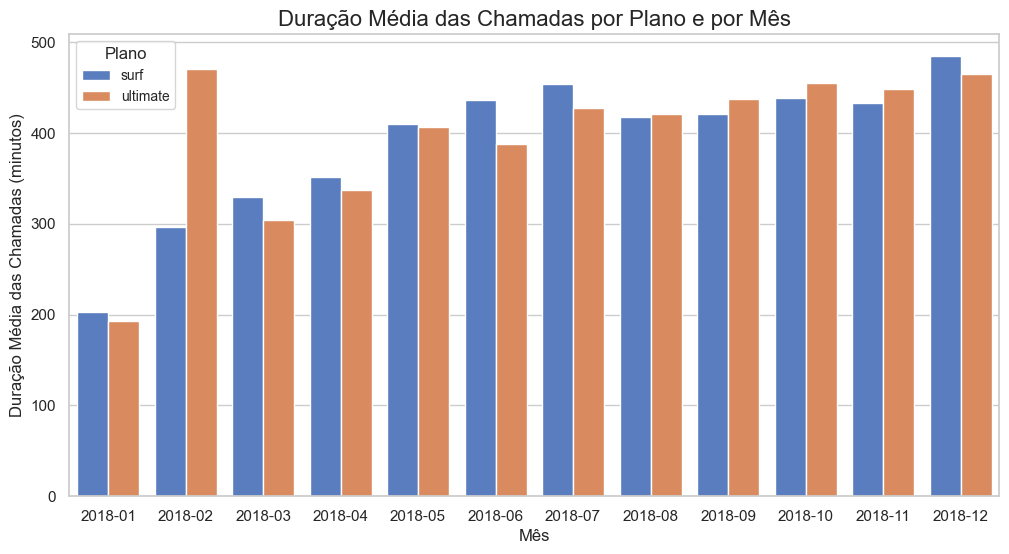

In [27]:
# Comparando a duração média das chamadas de cada plano para cada mês

# Calcular a duração média das chamadas por plano e por mês
avg_calls_duration = combined_data.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

# Renomear a coluna para maior clareza
avg_calls_duration.rename(columns={'total_minutes': 'avg_minutes'}, inplace=True)

# Configurar o estilo do gráfico
sns.set(style='whitegrid')

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(
    data=avg_calls_duration,
    x='month', y='avg_minutes', hue='plan', palette='muted'
)

# Adicionar título e rótulos
plt.title('Duração Média das Chamadas por Plano e por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Duração Média das Chamadas (minutos)', fontsize=12)
plt.legend(title='Plano', fontsize=10)
plt.show()


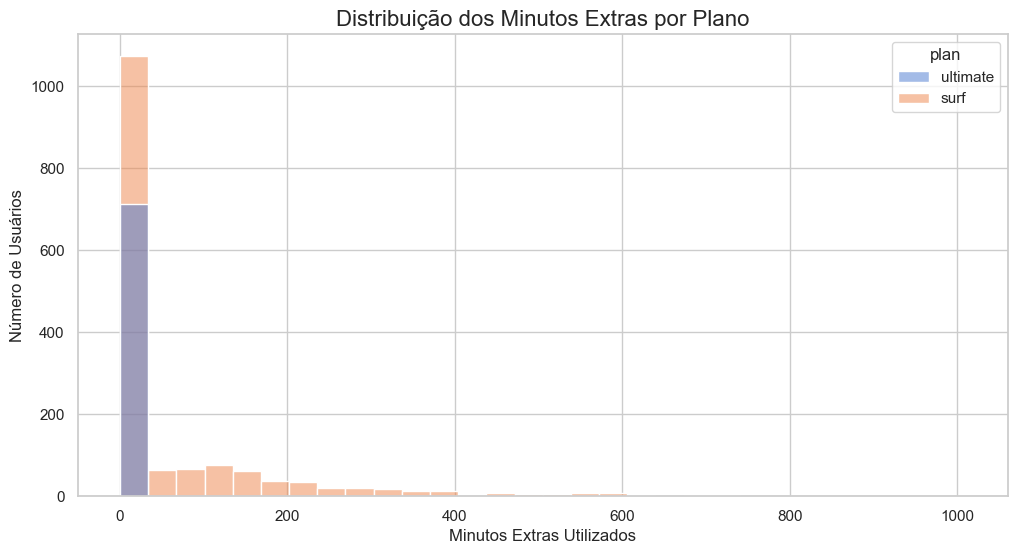

In [28]:
# Comparando o número de minutos que os usuários de cada plano necessitam a cada mês

# Calculando os minutos extras para cada usuário, se houver
combined_data['extra_minutes'] = combined_data['total_minutes'] - combined_data['minutes_included']
combined_data['extra_minutes'] = combined_data['extra_minutes'].apply(lambda x: max(x, 0))  # Garantir que não será negativo

# Criando o gráfico de histograma para comparar os minutos extras por plano
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='extra_minutes', hue='plan', palette='muted', bins=30)

# Adicionando título e rótulos aos eixos
plt.title('Distribuição dos Minutos Extras por Plano', fontsize=16)
plt.xlabel('Minutos Extras Utilizados', fontsize=12)
plt.ylabel('Número de Usuários', fontsize=12)

# Mostrar o gráfico
plt.show()

Calculando a média e a variância da duração das chamadas. Objetivo é refletir se os usuários de cada plano possuem comportamentos diferentes sobre as chamadas.

In [29]:
# Calculando a média e a variância da duração mensal das chamadas

# Calcular a média e a variância da duração das chamadas para cada plano
call_stats = combined_data.groupby('plan')['total_minutes'].agg(['mean', 'var'])

# Renomeando as colunas para facilitar a leitura
call_stats.rename(columns={'mean': 'average_duration', 'var': 'variance_duration'}, inplace=True)

# Exibir os resultados
print(call_stats)


          average_duration  variance_duration
plan                                         
surf            436.519741       52571.063243
ultimate        434.676017       56573.632247


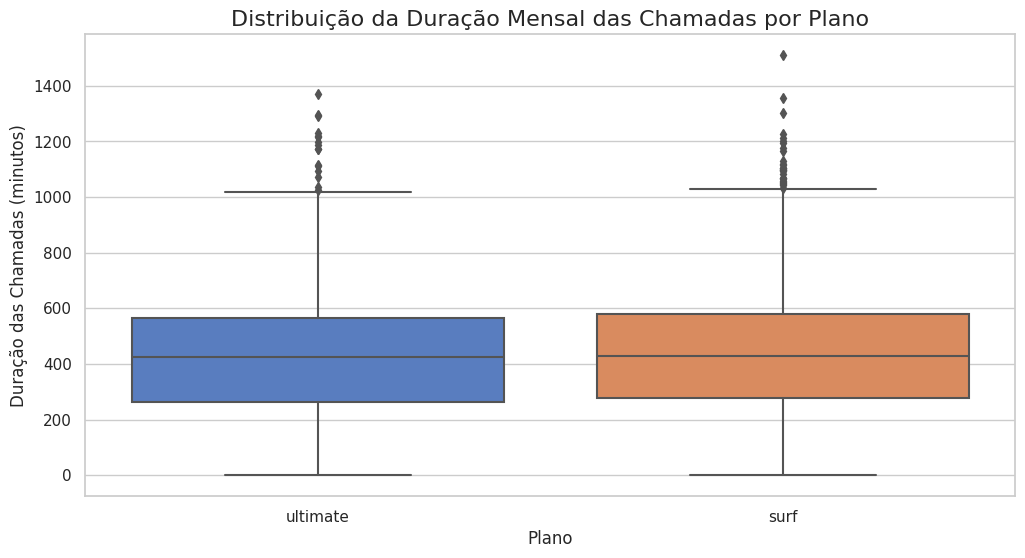

In [31]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas

# Criando o gráfico de boxplot para a distribuição da duração mensal das chamadas por plano
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_data, x='plan', y='total_minutes', palette='muted')

# Adicionando título e rótulos
plt.title('Distribuição da Duração Mensal das Chamadas por Plano', fontsize=16)
plt.xlabel('Plano', fontsize=12)
plt.ylabel('Duração das Chamadas (minutos)', fontsize=12)

# Exibir o gráfico
plt.show()


Com os filtros e diagramas que crie, posso concluir que existe uma equiparidade entre os dois planos tendo uma pequena diferença para o plano Surf. Inclusive no diagrama de caixa acima, vemos valores atipicos nos dois planos, com uma leve vantagem para o plano Surf.

### Mensagens

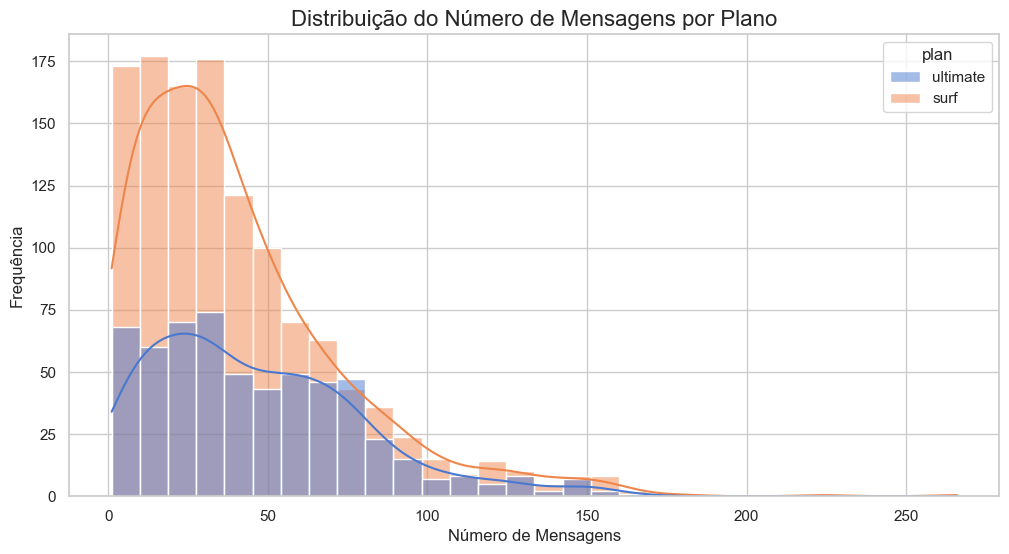

In [30]:
# Comparando o número de mensagens que os usuários de cada plano costumam enviar a cada mês

# Criando o histograma para o número de mensagens por plano
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='total_messages', hue='plan', kde=True, bins=30, palette='muted')

# Adicionando título e rótulos
plt.title('Distribuição do Número de Mensagens por Plano', fontsize=16)
plt.xlabel('Número de Mensagens', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Exibir o gráfico
plt.show()

**Em relação ao numero de mensagens x a frequência, encontramos mais discrepância nos dados. Percebe-se que até 60 mensagens o plano Surf parece muito acima do outro plano. A frequência de uso é maior no plano Surf.**  

### Internet

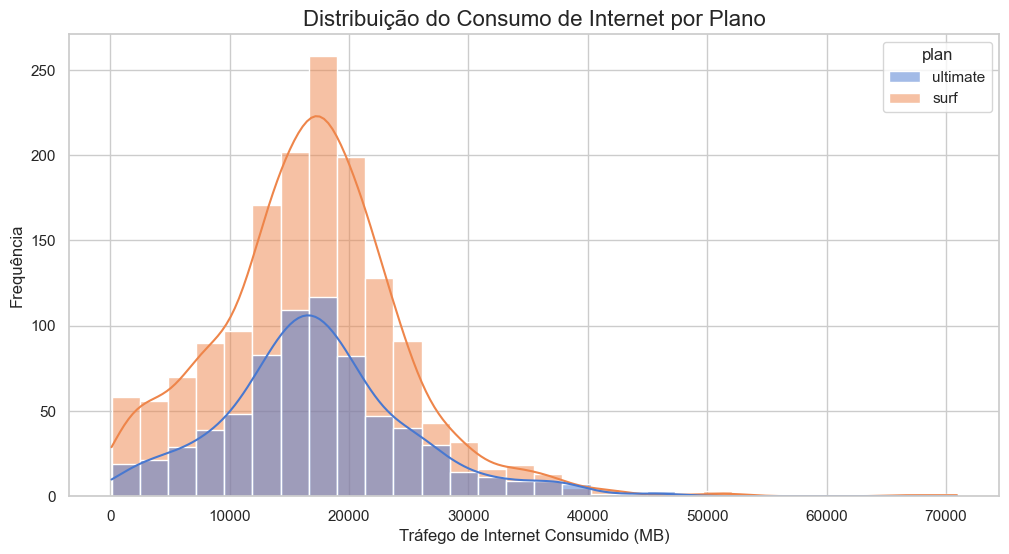

In [31]:
# Histograma para o consumo de internet por plano
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='total_internet_mb', hue='plan', kde=True, bins=30, palette='muted')

# Adicionar título e rótulos
plt.title('Distribuição do Consumo de Internet por Plano', fontsize=16)
plt.xlabel('Tráfego de Internet Consumido (MB)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Exibir o gráfico
plt.show()

**Sobre o consumo de internet nos dois planos, o plano Surf usa com mais frequêquencia que o outro plano. Podemos observar no pico do grafico que o plano Surf usa mais que o dobro que o outro plano.**

## Receita

Interessante verificar as receitas dos planos de forma estatística.

In [32]:
# Estatísticas descritivas sobre a receita mensal por plano
revenue_stats = combined_data.groupby('plan')['monthly_revenue'].describe()

# Exibir as estatísticas descritivas
print(revenue_stats)

           count       mean        std   min   25%        50%        75%  \
plan                                                                       
surf      1573.0  57.672846  53.860388  20.0  20.0  37.383477  77.120605   
ultimate   720.0  72.116080  10.768848  70.0  70.0  70.000000  70.000000   

                 max  
plan                  
surf      583.061309  
ultimate  178.522764  


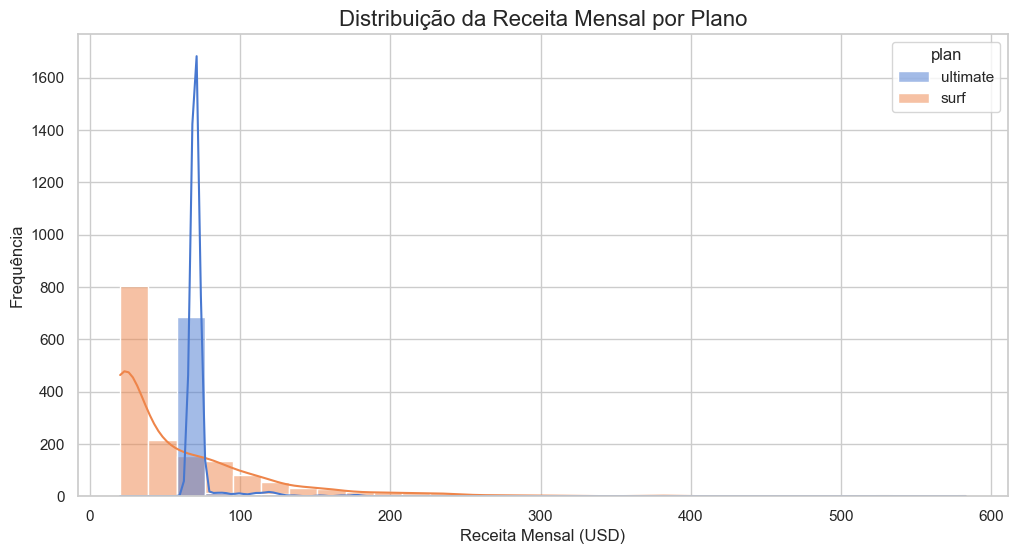

In [33]:
# Histograma para a receita mensal por plano
plt.figure(figsize=(12, 6))
sns.histplot(data=combined_data, x='monthly_revenue', hue='plan', kde=True, bins=30, palette='muted')

# Adicionar título e rótulos
plt.title('Distribuição da Receita Mensal por Plano', fontsize=16)
plt.xlabel('Receita Mensal (USD)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)

# Exibir o gráfico
plt.show()

In [37]:
# Exibir os valores únicos da coluna 'city'
print(combined_data['city'].unique())

['Atlanta-Sandy Springs-Roswell, GA MSA' 'Seattle-Tacoma-Bellevue, WA MSA'
 'Las Vegas-Henderson-Paradise, NV MSA' 'Tulsa, OK MSA'
 'Dallas-Fort Worth-Arlington, TX MSA'
 'San Francisco-Oakland-Berkeley, CA MSA' 'Grand Rapids-Kentwood, MI MSA'
 'Orlando-Kissimmee-Sanford, FL MSA'
 'San Jose-Sunnyvale-Santa Clara, CA MSA' 'Cleveland-Elyria, OH MSA'
 'Chicago-Naperville-Elgin, IL-IN-WI MSA' 'Knoxville, TN MSA'
 'New York-Newark-Jersey City, NY-NJ-PA MSA' 'Pittsburgh, PA MSA'
 'Fresno, CA MSA' 'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA'
 'Indianapolis-Carmel-Anderson, IN MSA' 'Jacksonville, FL MSA'
 'Los Angeles-Long Beach-Anaheim, CA MSA'
 'Omaha-Council Bluffs, NE-IA MSA'
 'Houston-The Woodlands-Sugar Land, TX MSA'
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA'
 'Tampa-St. Petersburg-Clearwater, FL MSA' 'Birmingham-Hoover, AL MSA'
 'Oklahoma City, OK MSA' 'Charlotte-Concord-Gastonia, NC-SC MSA'
 'Denver-Aurora-Lakewood, CO MSA'
 'Nashville-Davidson–Murfreesboro–Franklin, TN M

**Em relação a receita dos dois planos, embora tenha mais clientes com o plano mais barato que é Surf, esses clientes tem a tendencia de comprar mais pacotes extras durante o mês de chamadas, mensagens e internet fazendo com que a receita aumente com esse plano. Ja o plano Ultimate não constuma exceder seu pacote básico do mês.**

## Teste hipóteses estatísticas

Testando a hipótese de que a receita média dos usuários dos planos Ultimate e Surf são diferentes.

In [34]:
# Teste as hipóteses

# Separar as receitas dos dois grupos
revenue_ultimate = combined_data.loc[combined_data['plan'] == 'ultimate', 'monthly_revenue']
revenue_surf = combined_data.loc[combined_data['plan'] == 'surf', 'monthly_revenue']

alpha = 0.05

# Avaliar a igualdade das variâncias usando o teste de Levene
stat, p_var = levene(revenue_ultimate, revenue_surf)

print(f"Teste de Levene (variâncias): Estatística = {stat:.2f}, p-valor = {p_var:.5f}")

# Decisão sobre a igualdade de variâncias
equal_var = p_var > alpha

# Realizar o teste t para amostras independentes
t_stat, p_value = ttest_ind(revenue_ultimate, revenue_surf, equal_var=equal_var)

# Exibir os resultados
print(f"Estatística t: {t_stat:.2f}")
print(f"Valor-p: {p_value:.5f}")

# Conclusão baseada no valor-p
if p_value < alpha:
    print("Rejeitamos a hipótese nula: as receitas médias dos planos são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências de diferença nas receitas médias dos planos.")

# Indicar se as variâncias foram consideradas iguais ou diferentes
if equal_var:
    print("O teste T foi realizado assumindo variâncias iguais.")
else:
    print("O teste T foi realizado assumindo variâncias diferentes.")


Teste de Levene (variâncias): Estatística = 366.06, p-valor = 0.00000
Estatística t: 10.20
Valor-p: 0.00000
Rejeitamos a hipótese nula: as receitas médias dos planos são diferentes.
O teste T foi realizado assumindo variâncias diferentes.


Testando a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.

In [35]:
# Teste as hipóteses

# Filtrar os dados com str.contains para considerar NY-NJ
revenue_ny_nj = combined_data.loc[combined_data['city'].str.contains('NY-NJ', na=False), 'monthly_revenue']
revenue_other_regions = combined_data.loc[~combined_data['city'].str.contains('NY-NJ', na=False), 'monthly_revenue']

alpha = 0.05

# Avaliar a igualdade das variâncias usando o teste de Levene
stat, p_var = levene(revenue_ny_nj, revenue_other_regions)

print(f"Teste de Levene (variâncias): Estatística = {stat:.2f}, p-valor = {p_var:.5f}")

# Decisão sobre a igualdade de variâncias
equal_var = p_var >= alpha

if equal_var:
    print("As variâncias são iguais, usaremos equal_var=True no teste t.")
else:
    print("As variâncias são diferentes, usaremos equal_var=False no teste t.")

# Realizar o teste t para amostras independentes
t_stat, p_value = ttest_ind(revenue_ny_nj, revenue_other_regions, equal_var=equal_var)

# Exibir os resultados do teste t
print(f"Teste t: Estatística t = {t_stat:.2f}, p-valor = {p_value:.5f}")

# Conclusão baseada no valor-p
if p_value < alpha:
    print("Rejeitamos a hipótese nula: as receitas médias de NY-NJ e outras regiões são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências de diferença nas receitas médias.")

Teste de Levene (variâncias): Estatística = 1.32, p-valor = 0.25009
As variâncias são iguais, usaremos equal_var=True no teste t.
Teste t: Estatística t = -2.20, p-valor = 0.02808
Rejeitamos a hipótese nula: as receitas médias de NY-NJ e outras regiões são diferentes.


## Conclusão geral

**A análise de uma amostragem de clientes dos dois planos da empresa revelou que o plano Ultimate gera mais receita devido ao preço mais elevado e aos benefícios adicionais. Por outro lado, o plano Surf, por ser mais acessível, atrai uma clientela jovem que utiliza os recursos com maior intensidade e, frequentemente, precisa adquirir pacotes extras durante o mês. A venda extra de pacotes também gera uma importante receita** 

**Em uma análise específica da região de NY-NJ, identificou-se uma diferença significativa em relação às demais regiões(receita abaixa ao restante do mercado). Recomenda-se um estudo detalhado do perfil dos usuários nessa área para avaliar possíveis ajustes em estratégias de marketing ou preços.**

**Embora o plano Ultimate seja mais rentável, o plano Surf desempenha um papel fundamental ao atender a um público com necessidades específicas, como maior consumo de dados e demanda por pacotes adicionais.** 